In [1]:
import pandas as pd

In [ ]:
# 
pd.read_parquet("./data/Seeds/aligned_XY.gz")

In [ ]:
test = 

In [29]:
# list all the files in the directory
import os
os.listdir("./evaluation/non-augmentation/")

files = os.listdir("./evaluation/non-augmentation/")
# only keep the csv files containing "predictions"
files = [f for f in files if "predictions" in f]

# Write a function that reads the file but also adds the filename as a column
# the filename should serve as an identifier to distinguish the different files in the dataframe
# column can be "algorithm"  which is the name of the algorithm used to generate the predictions. The algorithm itslf can be deduced from the filename itself as they are of form "algorithm_a_predictions_.csv"
def read_file(file):
    df = pd.read_csv(f"./evaluation/non-augmentation/{file}", index_col=0)
    df["algorithm"] = file.split("predictions")[0]
    return df



In [37]:
# now read in all the files and concatenate them into a single dataframe
df = pd.concat([read_file(f) for f in files])
df

,JSD,WST,BC,Bhatt,algorithm
Alliaria petiolata,inf,0.001511,0.415562,0.239052,elastic_net_
Arabidopsis thaliana,inf,0.001773,0.550546,inf,elastic_net_
Astrantia major,inf,0.001918,0.849869,inf,elastic_net_
Avena sativa,inf,0.003856,0.843575,1.060980,elastic_net_
Barbarea vulgaris,inf,0.002195,0.518790,0.397866,elastic_net_
...,...,...,...,...,...
Rhinanthus glacialis,0.703293,0.003879,0.824282,1.043331,random_forest_
Scabiosa lucida,0.589116,0.002101,0.750361,0.601450,random_forest_
Sinapis arvensis,0.349923,0.001034,0.290034,0.175970,random_forest_
Solanum lycopersicum,0.510958,0.001850,0.581360,0.404250,random_forest_


In [38]:
# only keep columns["JSD"]
df = df[["JSD", "algorithm"]]

In [39]:
df

,JSD,algorithm
Alliaria petiolata,inf,elastic_net_
Arabidopsis thaliana,inf,elastic_net_
Astrantia major,inf,elastic_net_
Avena sativa,inf,elastic_net_
Barbarea vulgaris,inf,elastic_net_
...,...,...
Rhinanthus glacialis,0.703293,random_forest_
Scabiosa lucida,0.589116,random_forest_
Sinapis arvensis,0.349923,random_forest_
Solanum lycopersicum,0.510958,random_forest_


In [1]:
import pandas as pd

In [19]:

# read in other dataframe

compare = pd.read_excel("./evaluation/non-augmentation/compare_dist_vs_aligned.xlsx", index_col=0)


In [22]:
# only diplay max 1 columsn in the  output
pd.set_option('display.max_columns', 1)

In [23]:
compare

,Distance matrix_JSD,...
Alliaria petiolata,0.401520,...
Arabidopsis thaliana,0.490986,...
Astrantia major,0.728311,...
Avena sativa,0.781660,...
Barbarea vulgaris,0.439467,...
Berteroa incana,0.559263,...
Brassica napus,0.355087,...
Brassica nigra,0.438956,...
Brassica oleracea var. botrytis,0.583861,...
Brassica oleracea var. capitata,0.345083,...


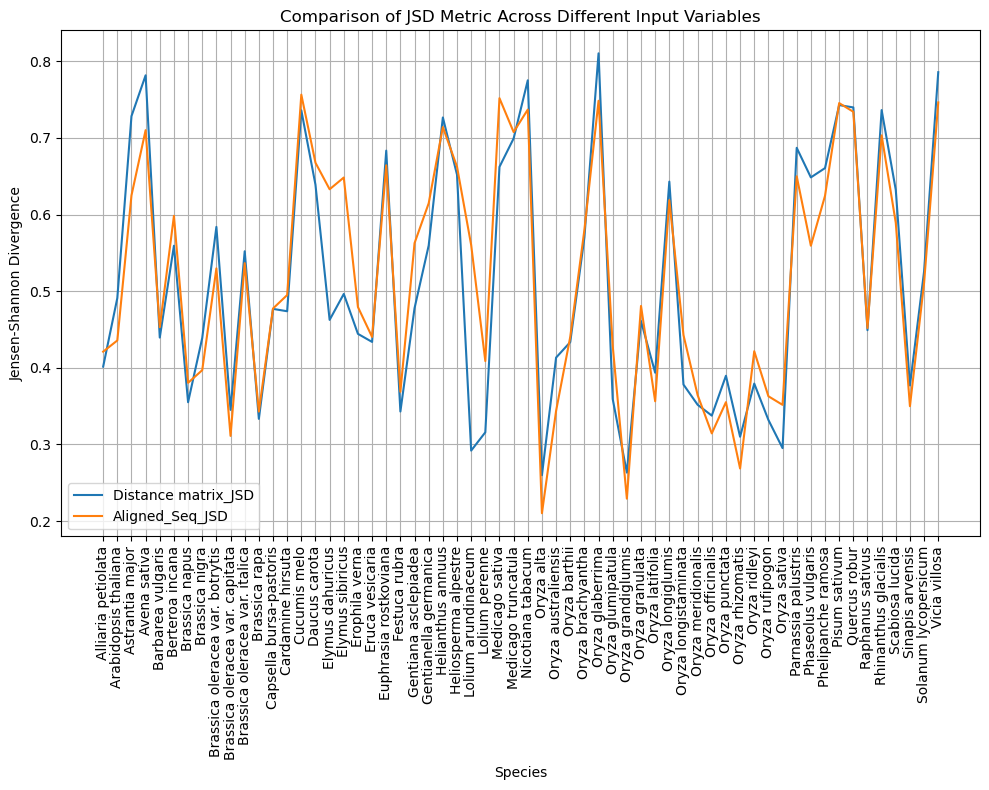

In [14]:
import matplotlib.pyplot as plt
# plot the columnsof dataframe "compare" in a line chart with the index as the x-axis

plt.figure(figsize=(10, 8))
for column in compare.columns:
    plt.plot(compare.index, compare[column], label=column)
plt.title(f"Comparison of JSD Metric Across Different Input Variables")
plt.xlabel("Species")
plt.ylabel("Jensen-Shannon Divergence")
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()  # Adjust layout to not cut off labels
# plt.savefig(f"./evaluation/global/{AUGMENTATION_PATH}/{metric_name}_comparison.png")
plt.show()



In [16]:
# caluculate the mean of the JSD column for each algorithm
compare.mean()

Distance matrix_JSD    0.512074
Aligned_Seq_JSD        0.517874
dtype: float64

In [20]:
mean_1 = pd.read_csv("./evaluation/non-augmentation/mean_errors_over_algorithms.csv", index_col=0)

In [24]:
mean_2 = pd.read_csv("./evaluation/non-augmentation/mean_errors_over_algorithms_distance_matrix_input.csv", index_col=0)

In [27]:
# concatenate the two dataframes
mean = pd.concat([mean_1, mean_2])
mean

# only shwo rows containing "JSD"
mean = mean[mean.index.str.contains("JSD")]
mean

,0
elastic_net_aligned_JSD,inf
linear_regression_aligned_JSD,inf
random_forest_aligned_JSD,0.517874
elastic_net_JSD,0.641901
gpr_JSD,0.510998
knn_JSD,0.513173
random_forest_JSD,0.512074


## Things to do

- Feature Engineering
  - feature filtering
    - remove features with low variance
  - feature selection
    - recursive feature elimination
    - forward feature selection, backward feature selection
- Dimensionality Reduction (PCA)
- other algorithms: XGBoost


In [2]:
import pandas as pd
pd.set_option('display.max_columns', 2) 

In [14]:
from helper_functions.preprocessing_functions import filter_targets

In [ ]:
input = pd.read_parquet("./data/Seeds/aligned_XY.gz")
input.head()

In [15]:

# get the feature length
feature_length = 813

# filter the targets
df_red, microbes_left = filter_targets(input, feature_length)
print("Number Microbes left:", len(microbes_left))

# average the samples over the species
df_avg = df_red.groupby(df_red.index).mean()

Number Microbes left: 372


In [19]:
input_features = df_avg.iloc[:, :feature_length]

In [20]:
input_features

,V1,...,V813
species,,,
Alliaria petiolata,18.0,...,18.0
Arabidopsis thaliana,18.0,...,18.0
Astrantia major,18.0,...,18.0
Avena sativa,18.0,...,18.0
Barbarea vulgaris,18.0,...,18.0
Berteroa incana,18.0,...,18.0
Brassica napus,18.0,...,18.0
Brassica nigra,18.0,...,18.0
Brassica oleracea var. botrytis,18.0,...,18.0


In [22]:
def remove_low_cv_features(df, threshold=0.01):
    """
    Removes columns with a coefficient of variation below a specified threshold.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    threshold (float): The CV threshold below which features will be removed.
    
    Returns:
    pd.DataFrame: A DataFrame with low CV columns removed.
    """
    # Calculate mean and standard deviation for each column
    mean = df.mean()
    std = df.std()
    
    # Calculate coefficient of variation for each column
    cv = std / mean
    
    # Filter out columns with CV below the threshold
    columns_to_keep = cv[cv >= threshold].index
    
    return df[columns_to_keep]


In [33]:
filtered_df = remove_low_cv_features(input_features, threshold=0.5)

In [34]:
filtered_df.shape

(60, 478)